<a href="https://colab.research.google.com/github/DeniseKelley/CodePath-IOS/blob/main/Midterm1_2021_python(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm 1:  Python Problems


There are three python problems.  Answer all the sections marked `#TODO`.  Print to PDF.  Submit the PDF only. 

## Loading Packages and Data

For the problems, you can use the following packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

Run the following code to download the data for the midterm.  This will retrieve three files -- one for each problem.

In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
file_path = 'https://drive.google.com/file/d/10_1PxDIoSiuuOFC_iyVaoU9bDiQYHcTT/view?usp=sharing'
file_id = '10_1PxDIoSiuuOFC_iyVaoU9bDiQYHcTT'

dst = 'midterm_data.zip'
download_file_from_google_drive(file_id, dst)


# Unzip the files
import zipfile
with zipfile.ZipFile(dst, 'r') as zip_ref:
    zip_ref.extractall('data')
    
    
# Move them to the top directory
import shutil
for fn in ['prob_linear.p', 'prob_model.p', 'prob_logistic.p']:
    src = 'data/midterm1_data/%s' % fn
    shutil.move(src, fn)
    print('%s loaded' % fn)

prob_linear.p loaded
prob_model.p loaded
prob_logistic.p loaded


## Problem 1.  Linear Regression

Run the following code to load the data

In [ ]:
with open('prob_linear.p', 'rb') as fp:
    X,y = pickle.load(fp)

Split the data into training and test.  You may use the `train_test_split` function.

In [ ]:
# TODO
#    Xtr, Xts, ytr, yts = train_test_split(...)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size = 0.5 )

Suppose we want to fit a model of the form:

    yhat[i] = b + w[0]*X[i,0] + w[1]*X[i,1] + w[2]*X[i,0]*X[i,1] + w[3]*X[i,0]**2 + w[4]*X[i,1]**2
    
Complete the function `transform` below that creates a matrix `Z` whose columns are the basis functions for this model.  You may use the `np.column_stack()` function.  For example,

    Z = np.column_stack((col1, col2, col3))
    
creates a matrix `Z` with columns `col1`, `col2`, and `col3`.

In [ ]:
def transform(X):
    # TODO
    #   Z = ...
    # yhat[i] = b + w[0]*X[i,0]    + w[1]*X[i,1] +    w[2]*X[i,0]*X[i,1] + 
    #             + w[3]*X[i,0]**2 + w[4]*X[i,1]**2

    # yhat = b + w[0]*X[:,0]    + w[1]*X[:,1] +    w[2]*X[:,0]*X[:,1] + 
    #             + w[3]*X[:,0]**2 + w[4]*X[:,1]**2
    # w is from 0 to 4, so there are 5 basis functions 
    #if i understood it correctly each column is a basis function, thus
    #there will be 5 columns
    #n=X.shape[0]
    #col0 = np.once(n)
    col1=X[:,0]
    col2=X[:,1]
    col3=X[:,0]*X[:,1]
    col4=X[:,0]**2
    col5=X[:,1]**2

    Z= np.column_stack((col1,col2,col3,col4,col5))
    return Z
 


Now fit and evaluate the model:

* Fit the model on the training data.  You may use the `LinearRegression` object and the `transform` function above.
* Predict the values `y` on the test data
* Print the test MSE 


In [ ]:
# TODO
from sklearn import linear_model
z=transform(X)
ztr = transform(Xtr)
zts = transform(Xts)
reg = linear_model.LinearRegression()

#ztr, zts = train_test_split(z,test_size=0.5 )
reg.fit(ztr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat = reg.predict(zts)
acc = np.mean(yhat==yts)
mse = np.mean((ytr-yhat)**2)
print(mse)
print(acc)


0.29574604349551087
0.0


## Problem 2.  Model Selection

Run the code below to load and plot the data.
The data is from two experiments:

*  `Xtr[:,0], Ytr[:,0]` is the training data from experiment 0
*  `Xtr[:,1], Ytr[:,1]` is the training data from experiment 1
*  `Xts[:,0], Yts[:,0]` is the test data from experiment 0
*  `Xts[:,1], Yts[:,1]` is the test data from experiment 1



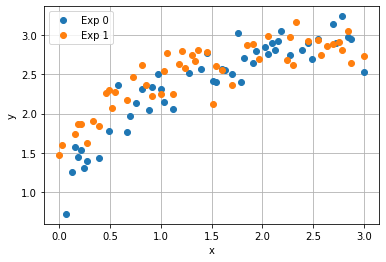

In [ ]:
with open('prob_model.p', 'rb') as fp:
    Xtr, Xts, Ytr, Yts = pickle.load(fp)
    
plt.plot(Xtr[:,0], Ytr[:,0], 'o')
plt.plot(Xtr[:,1], Ytr[:,1], 'o')
plt.legend(['Exp 0', 'Exp 1'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

(50, 2)


You want to learn the relation between `y` vs. `x`. 

First, fit two *separate* models for each experiment of the form:
    
     Y[:,0] ~= a0 + b0*exp(-X[:,0])
     Y[:,1] ~= a1 + b1*exp(-X[:,1])
    
 
For the data in each experiment, fit the model and pint the test MSE.

You may use the `LinearRegression` function for the fitting. But, if `z` is a vector (not a matrix), you cannot use:

     reg = LinearRegression()
     reg.fit(z, y)   # WILL NOT WORK if z is a vector.
     
You must reshape `z` to a `n x 1` matrix first:

     reg = LinearRegression()
     reg.fit(z[:,None], y)   # This will work


In [ ]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
Xtr = scal.fit_transform(Xtr)
Xts = scal.transform(Xts)

In [ ]:
#first fit two models
#
#Y[:,0] ~= a0 + b0*exp(-X[:,0])
#Y[:,1] ~= a1 + b1*exp(-X[:,1])
print(Xtr.shape)
n=len(Xtr)
ztr=np.zeros((n,2))
zts=np.zeros((n,2))
print(z.shape)

ztr[:,0] = np.exp(-Xtr[:,0])
ztr[:,1] = np.exp(-Xtr[:,1])
zts[:,0] = np.exp(-Xts[:,0])
zts[:,1] = np.exp(-Xts[:,1])


(50, 2)
(50, 2)


In [ ]:
reg = LinearRegression()
#reg.fit(ztr, ytr)
#reg.fit(z[:,None], y)   # This will work but it didn't work for me
n=ztr.shape[1]
print(Ytr.shape)
for i in range(n):
  reg.fit(ztr,Ytr[:,i]) 
  Yhat = reg.predict(zts)

(50, 2)


In [ ]:
# TODO
#   nexp = Xtr.shape[1]  # number of experiments = 2
#   for i in range(nexp):
#      ...
#      mse = ...
#yhat=reg.predict(zts)
nexp = Xtr.shape[1]
for i in range(nexp):
  mse = np.mean((ztr[:,i]-Yhat)**2)
  print("mse ", i, mse)

mse  0 3.3032045515019117
mse  1 3.1105155582392645


Now, fit a model of the form:

     Y[:,0] = a + b0*exp(-X[:,0])
     Y[:,1] = a + b1*exp(-X[:,1])
     
So, the two experiments have the same  intercept term.  Fit the model on the training data and measure the test MSE.

For training, you will want to combine the data into a single feature matrix `Z` using `Xtr[:,0]` and `Xts[:,1]` and single target vector `b` from `Ytr[:,0]` and `Ytr[:,1]`.  


## Problem 3.  Logistic Regression

Run the following code to load the data as follows:

In [ ]:
with open('prob_logistic.p', 'rb') as fp:
    X,y = pickle.load(fp)

Plot a scatter plot of the data with different colors for the two classes.  You may use the `plt.scatter` function.

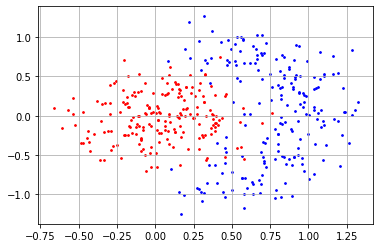

In [ ]:
# TODO

plt.scatter(X[:,0][y==0], X[:,1][y==0], s=3, c='r')
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=3, c='b')
#plt.show()
plt.grid()

Split the data into training and test.  You may use the `train_test_split` method.  Use `test_size=0.5`.

In [ ]:
# TODO
#   Xtr, Xts, ytr, yts = train_test_split(...)
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size =0.5)

Consider a classifier of the form:

    yhat[i] = 1 when z[i] > t
    yhat[i] = 0 when z[i] <= t
         
where `z[i] = X[i,0] + np.abs(X[i,1])`.
         
For each value `t` in `ttest`, compute the accuracy of the classifier on the *training* data. 
Plot the training accuracy as a function of `t`.

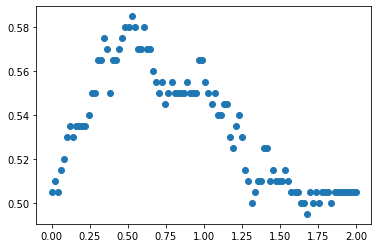

In [ ]:
ttest = np.linspace(0,2,100)

# TODO
#   for t in test:
#      ...

#reg = linear_model.LogisticRegression(C=1e5)
#reg.fit(Xtr, ytr)
#yhat = reg.predict(Xts)
#acc = np.mean(yhat==yts)
acc = []
for t in ttest:
  z=Xtr[:,0]+np.abs(Xtr[:,1])
  #yhat = 1 z>t
  #yhat = 0 z<t
  yhat=(z>t).astype(int)
  acc.append(np.mean(yhat==yts))
  #print(acc)

  
plt.plot(ttest, acc,'o')

Find the value of `t` with the highest training accuracy.  Print the test accuracy for the classifier with that value of `t`.

In [ ]:
# TODO: 
#    topt = ...
#highest accuracy
acc_h=np.max(acc)
print("highest accuracy is: ",acc_h)


sort_index_arr = np.argsort(acc)
#sort_arr = acc[sort_index_arr]
n=1
rslt = sort_arr[-n :]
print("highest accuracy at index: ", rslt)
print("t value at that index is: ",ttest[rslt])
# TODO.
#    acc_ts = ...

highest accuracy is:  0.585
highest accuracy at index:  [26]
t value at that index is:  [0.52525253]
